In [1]:
print("https://ned.ipac.caltech.edu/conesearch?in_csys=Equatorial&in_equinox=J2000&coordinates=17h15m22.992s%20%2B57d24m40.33s&radius=45&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1&z_constraint=Between&z_value1=6000&z_value2=10000&z_unit=km%2Fs&ot_include=ANY&in_objtypes1%5BGalaxies%5D=Galaxies&in_objtypes1%5BGPairs%5D=GPairs&in_objtypes1%5BGTriples%5D=GTriples&in_objtypes1%5BGGroups%5D=GGroups&in_objtypes1%5BGClusters%5D=GClusters&in_objtypes1%5BQSO%5D=QSO&in_objtypes1%5BQSOGroups%5D=QSOGroups&in_objtypes1%5BGravLens%5D=GravLens&in_objtypes1%5BAbsLineSys%5D=AbsLineSys&in_objtypes1%5BEmissnLine%5D=EmissnLine&in_objtypes2%5BRadio%5D=Radio&in_objtypes2%5BSmmS%5D=SmmS&in_objtypes3%5BSupernovae%5D=Supernovae&in_objtypes3%5BEmissnObj%5D=EmissnObj&in_objtypes3%5BEmissnNeb%5D=EmissnNeb&nmp_op=ANY&search_type=Near%20Position%20Search&out_csys=Same%20as%20Input&out_equinox=Same%20as%20Input&obj_sort=Distance%20to%20search%20center")

https://ned.ipac.caltech.edu/conesearch?in_csys=Equatorial&in_equinox=J2000&coordinates=17h15m22.992s%20%2B57d24m40.33s&radius=45&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1&z_constraint=Between&z_value1=6000&z_value2=10000&z_unit=km%2Fs&ot_include=ANY&in_objtypes1%5BGalaxies%5D=Galaxies&in_objtypes1%5BGPairs%5D=GPairs&in_objtypes1%5BGTriples%5D=GTriples&in_objtypes1%5BGGroups%5D=GGroups&in_objtypes1%5BGClusters%5D=GClusters&in_objtypes1%5BQSO%5D=QSO&in_objtypes1%5BQSOGroups%5D=QSOGroups&in_objtypes1%5BGravLens%5D=GravLens&in_objtypes1%5BAbsLineSys%5D=AbsLineSys&in_objtypes1%5BEmissnLine%5D=EmissnLine&in_objtypes2%5BRadio%5D=Radio&in_objtypes2%5BSmmS%5D=SmmS&in_objtypes3%5BSupernovae%5D=Supernovae&in_objtypes3%5BEmissnObj%5D=EmissnObj&in_objtypes3%5BEmissnNeb%5D=EmissnNeb&nmp_op=ANY&search_type=Near%20Position%20Search&out_csys=Same%20as%20Input&out_equinox=Same%20as%20Input&obj_sort=Distance%20to%20search%20center


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import hiviewer as hv
import os
from astropy import log

In [2]:
import sys
sys.path.append('/data/inspur_disk04/FAST/xuc/FAST/obs_plan/ObsHelper/')
from opt_source import OptSource

from astroquery.ipac.ned import Ned
table = Ned.query_region(self.name, radius = 30 * u.arcmin,verbose=True)

In [3]:
ra, dec = 258.845800, 57.411203
dist = 120
self = OptSource('NGC6338', ra, dec,dist)

In [5]:
aladin = self.ialadin(fov = 3/60, survey= 'SDSS9 color',width='50%')
aladin

Aladin(fov=0.05, layout=Layout(width='50%'), options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen',…

In [6]:
self.add_table('./NGC6338_ned_allz.csv')
self.get_sep()
aladin.add_table(self.table)
self.add_table('./NGC6338_ned_search.csv')
self.get_sep()
aladin.add_table(self.table)
self.add_table('/data/inspur_disk04/FAST/xuc/FAST/catalogs/nvss_catalog.fit', r = 45)
aladin.add_table(self.table)

In [7]:
# 选择off点
from astropy.coordinates import SkyCoord
from astropy import units as u
c = SkyCoord('17 13 43.593 +56 57 59.04', unit = (u.hour, u.deg))

ra, dec = c.ra.value, c.dec.value
dist = 0
off = OptSource('NGC 6338 off', ra, dec,dist)

aladin_off = off.ialadin(fov = 3/60, survey= 'SDSS9 color',width='50%')
aladin_off

Aladin(fov=0.05, layout=Layout(width='50%'), options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen',…

In [8]:
off.add_table('./NGC6338_ned_allz.csv')
off.get_sep()
aladin_off.add_table(off.table)
off.add_table('./NGC6338_ned_search.csv')
off.get_sep()
aladin_off.add_table(off.table)

#### Object ####
Previous Transit time: 2023-04-01 05:32:23.000
Next Transit time: 2023-04-02 05:28:27.000
#### Sun ####
Previous Rise time: 2023-04-01 06:44:23.000
Next Set time: 2023-04-01 19:09:11.000


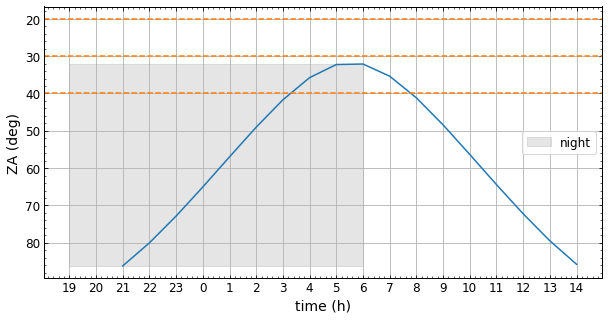

In [9]:
self.plot_ZA(BJ_time='2023-04-01 05:00:00')

In [10]:
self.get_opt_image(surveys = ["DSS2 Blue"], size = 4.3)

Retrieving...


Saved ./tmp/NGC6338_DSS2 Blue_0-opt.fits
Finish!


In [11]:
opt = hv.FitsPic(self.optnames[0])

Showing image.


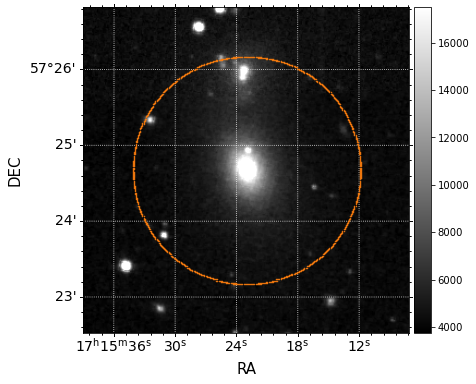

In [12]:
ax = opt.plot_slice(per_vmin_max = .99)
ax.grid(color = 'white',ls = ':')
self.plot_radius(ax, opt, radius = 1.5, dr = 0.01)